# Project 1: Long vs. Wide Format - Animated Scatterplot

## The Goals:
In this project, you will visually analyze the Gapminder Dataset.
https://www.gapminder.org/data

1. complete the command line tutorial
2. set up a project folder
3. create your own branch in a joint git repository
4. read gapminder data into pandas
5. draw a histogram with pandas
6. draw a scatterplot with matplotlib
7. create an animated scatterplot – like the one by Hans Rosling.
8. upload your code to GitHub



In [18]:
###In this exercise you will reproduce Hans Rosling’s famous animation. You’ll take all the pandas skills you’ve learned so far and apply it to an epic data visualization / storytelling task.
# Here’s the rough idea:
# 1. Read in data from multiple sources:
#           worldwide fertility rate data
#           worldwide life expectancy data
#           worldwide population data
# 2. Merge all the data into a single DataFrame.
# 3. Generate a scatterplot for a single year.
# 4. Combine images of scatterplots of all years to make an animation / gif.

In [1]:
import pandas as pd

In [2]:
fert = pd.read_csv("../w1_Data/gapminder_total_fertility.csv", nrows = 260, index_col= 0)
fert

FileNotFoundError: [Errno 2] No such file or directory: '../w1_Data/gapminder_total_fertility.csv'

In [ ]:
len(fert)

260

In [ ]:
life = pd.read_excel("../w1_Data/gapminder_lifeexpectancy.xlsx", index_col=0)
life.head()
print(life.shape)
print(fert.shape)

(260, 217)
(260, 216)


In [ ]:
fert.columns
#numbers are strings in a list not int 

Index(['1800', '1801', '1802', '1803', '1804', '1805', '1806', '1807', '1808',
       '1809',
       ...
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015'],
      dtype='object', length=216)

In [ ]:
life.columns

Float64Index([1800.0, 1801.0, 1802.0, 1803.0, 1804.0, 1805.0, 1806.0, 1807.0,
              1808.0, 1809.0,
              ...
              2007.0, 2008.0, 2009.0, 2010.0, 2011.0, 2012.0, 2013.0, 2014.0,
              2015.0, 2016.0],
             dtype='float64', length=217)

In [ ]:
# To merge the tables, we need to convert both into the same format:
fert.columns = fert.columns.astype(int)
fert.columns

Int64Index([1800, 1801, 1802, 1803, 1804, 1805, 1806, 1807, 1808, 1809,
            ...
            2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015],
           dtype='int64', length=216)

In [ ]:
#Now, let’s check the row index of the table:
fert.index
fert.index.name = "country"

In [ ]:
# Now convert the table into long format. 
# First, we have to move the row index into a column:
fert = fert.reset_index()
fert

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Abkhazia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,6.70,6.46,6.20,5.93,5.66,5.40,5.14,4.90,4.68,4.47
2,Akrotiri and Dhekelia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,1.85,1.80,1.76,1.74,1.74,1.75,1.76,1.77,1.78,1.78
4,Algeria,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,6.99,...,2.58,2.66,2.73,2.78,2.82,2.83,2.82,2.80,2.76,2.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,Yugoslavia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,Zambia,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,...,5.93,5.91,5.88,5.85,5.81,5.77,5.73,5.69,5.64,5.59
257,Zimbabwe,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,6.75,...,3.94,3.90,3.85,3.79,3.72,3.64,3.56,3.49,3.41,3.35
258,Åland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Second, we use the convenient melt function for the conversion:

fert = fert.melt(id_vars='country', var_name='year', value_name='fertility_rate')
fert

,country,year,fertility_rate
0,Abkhazia,1800,NaN
1,Afghanistan,1800,7.00
2,Akrotiri and Dhekelia,1800,NaN
3,Albania,1800,4.60
4,Algeria,1800,6.99
...,...,...,...
56155,Yugoslavia,2015,NaN
56156,Zambia,2015,5.59
56157,Zimbabwe,2015,3.35
56158,Åland,2015,NaN


In [ ]:
# rename column name of Life expectancy to country
#life = life.rename(columns={"Life expectancy" : "country"})
life.index
life.index.name = "country"

In [ ]:
life = life.reset_index()

In [ ]:
#Repeat steps 5-6 for the life expectancy data, so that it’s also in long format.
life = life.melt(id_vars='country', var_name='year', value_name='Life expectancy')
life

,country,year,Life expectancy
0,Abkhazia,1800.0,NaN
1,Afghanistan,1800.0,28.21
2,Akrotiri and Dhekelia,1800.0,NaN
3,Albania,1800.0,35.40
4,Algeria,1800.0,28.82
...,...,...,...
56415,Yugoslavia,2016.0,NaN
56416,Zambia,2016.0,57.10
56417,Zimbabwe,2016.0,61.69
56418,Åland,2016.0,NaN


In [ ]:
#To make things even more interesting, 
# let’s also introduce population data from the file data/gapminder_population.xlsx.
# Read the data in with pandas, and get that DataFrame into the same format as the other two.
pop = pd.read_excel("../w1_Data/gapminder_population.xlsx")
pop.head()
pop = pop.rename(columns={"Total population" : "country"})
pop.head()
pop.set_index("country")
pop = pop.melt(id_vars='country', var_name='year', value_name='Total population')
pop
pop["Total population"] = pop["Total population"]/1e+06
pop

,country,year,Total population
0,Abkhazia,1800.0,NaN
1,Afghanistan,1800.0,3.280000
2,Akrotiri and Dhekelia,1800.0,NaN
3,Albania,1800.0,0.410445
4,Algeria,1800.0,2.503218
...,...,...,...
22270,Northern Marianas,2015.0,NaN
22271,South Georgia and the South Sandwich Islands,2015.0,NaN
22272,US Minor Outlying Islands,2015.0,NaN
22273,Virgin Islands,2015.0,NaN


In [ ]:
cont = pd.read_csv("../w1_Data/continents.csv", sep=";")
cont.head()

,continent,country
0,Africa,Algeria
1,Africa,Angola
2,Africa,Benin
3,Africa,Botswana
4,Africa,Burkina


In [ ]:
#Now we can start gluing the DataFrames together. This works great with the merge function:
df1 = fert.merge(pop)
df2 = df1.merge(cont)
df = df2.merge(life)
df.head()

,country,year,fertility_rate,Total population,continent,Life expectancy
0,Afghanistan,1800,7.0,3.280000,Asia,28.21
1,Afghanistan,1810,7.0,3.280000,Asia,28.11
2,Afghanistan,1820,7.0,3.323519,Asia,28.01
3,Afghanistan,1830,7.0,3.448982,Asia,27.90
4,Afghanistan,1840,7.0,3.625022,Asia,27.80


<AxesSubplot:xlabel='Life expectancy', ylabel='fertility_rate'>

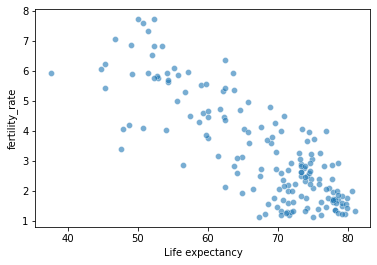

In [ ]:
#With all the data merged into a single object, you can now select specific 
# columns and plot them:

import seaborn as sns
import matplotlib.pyplot as plt

df_subset = df.loc[df["year"] == 2000]
sns.scatterplot(x="Life expectancy", y= "fertility_rate", data = df_subset, alpha = 0.6)

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
data = df
data

,country,year,fertility_rate,Total population,continent,Life expectancy
0,Afghanistan,1800,7.00,3.280000,Asia,28.21
1,Afghanistan,1810,7.00,3.280000,Asia,28.11
2,Afghanistan,1820,7.00,3.323519,Asia,28.01
3,Afghanistan,1830,7.00,3.448982,Asia,27.90
4,Afghanistan,1840,7.00,3.625022,Asia,27.80
...,...,...,...,...,...,...
14170,Zimbabwe,2011,3.64,14.255592,Africa,51.60
14171,Zimbabwe,2012,3.56,14.565482,Africa,54.20
14172,Zimbabwe,2013,3.49,14.898092,Africa,55.70
14173,Zimbabwe,2014,3.41,15.245855,Africa,57.00


In [ ]:
Population = data["Total population"]
Lifeexpectancy = data["Life expectancy"]
Fertilityrate = data["fertility_rate"]

In [ ]:
#create dataset with only years 1960-2015
# data = df.loc[(df["year"].between(1960,2000))].copy(deep=True)
# data = df.loc[(df["year"] >= 1960) & (df["year"] <=2000)]
data = df.loc[(df["year"] >= 1960)].copy(deep=True)
data

,country,year,fertility_rate,Total population,continent,Life expectancy
25,Afghanistan,1960,7.67,8.994793,Asia,31.94
26,Afghanistan,1961,7.67,9.164945,Asia,32.47
27,Afghanistan,1962,7.67,9.343772,Asia,33.01
28,Afghanistan,1963,7.67,9.531555,Asia,33.53
29,Afghanistan,1964,7.67,9.728645,Asia,34.07
...,...,...,...,...,...,...
14170,Zimbabwe,2011,3.64,14.255592,Africa,51.60
14171,Zimbabwe,2012,3.56,14.565482,Africa,54.20
14172,Zimbabwe,2013,3.49,14.898092,Africa,55.70
14173,Zimbabwe,2014,3.41,15.245855,Africa,57.00


In [ ]:
data["year"] = pd.to_numeric(data["year"])

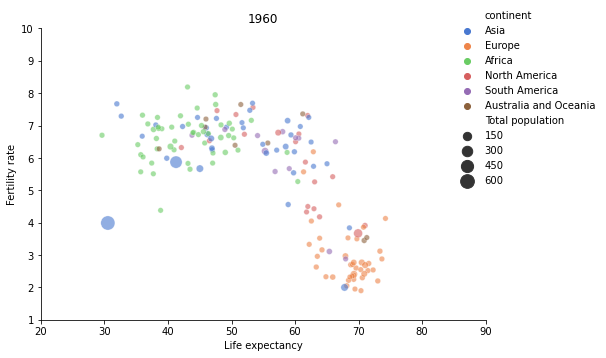

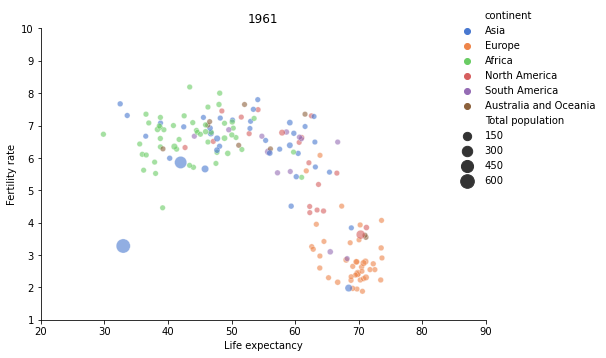

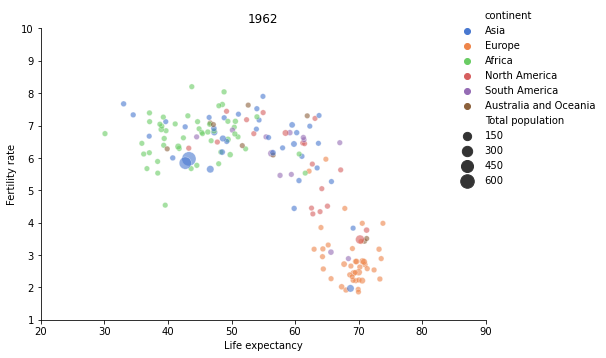

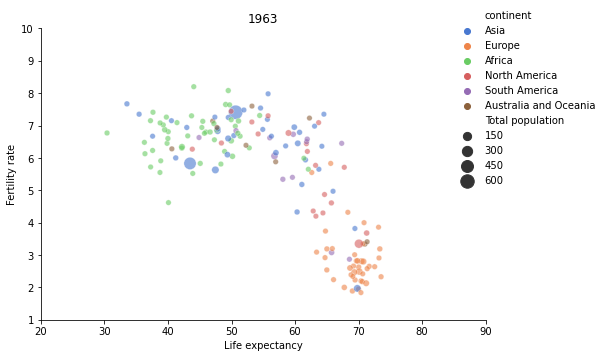

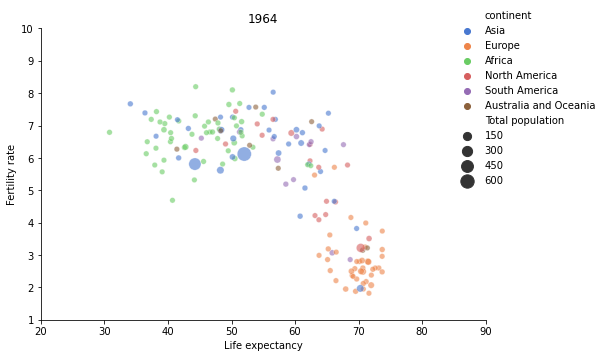

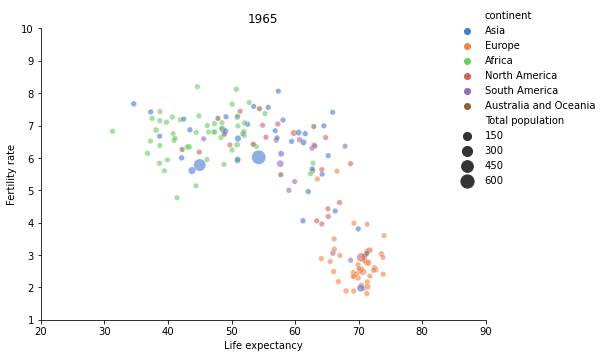

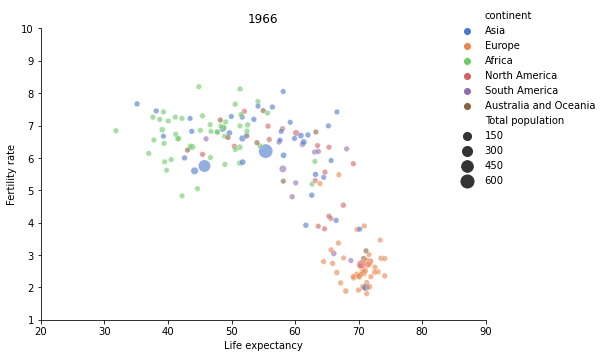

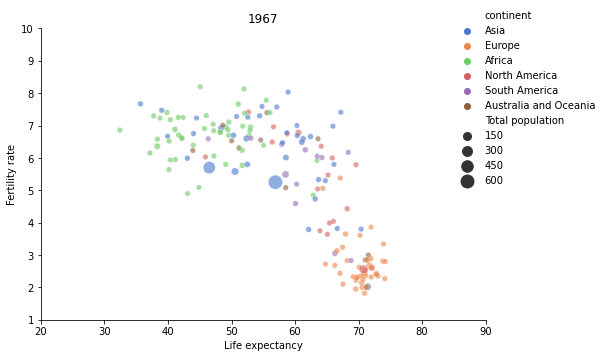

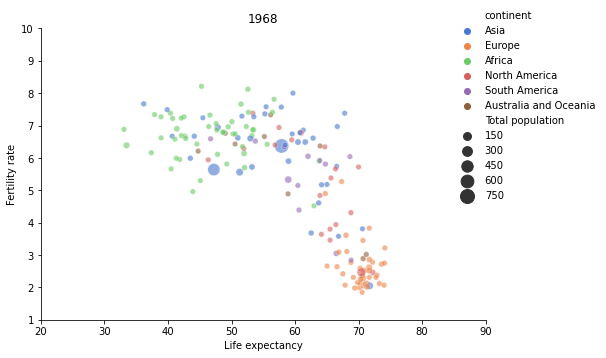

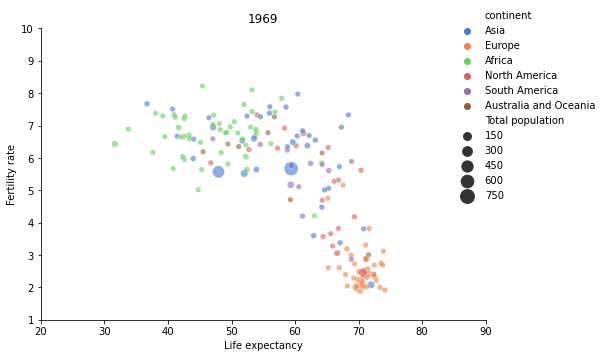

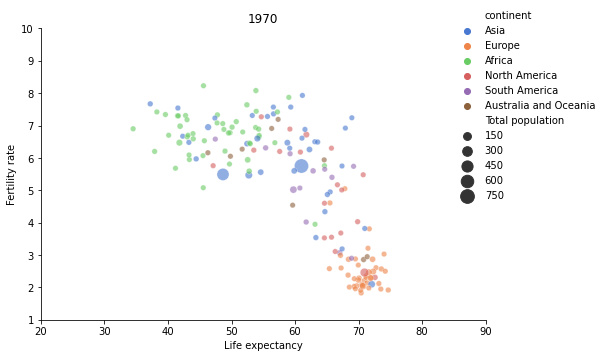

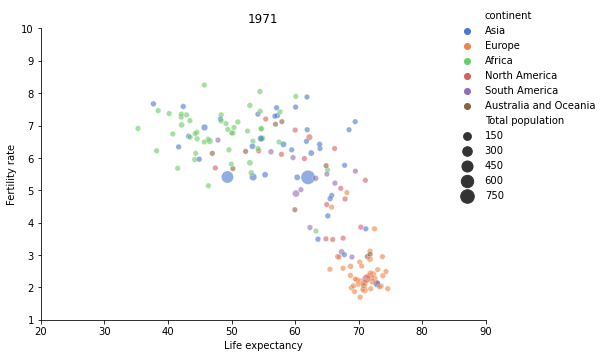

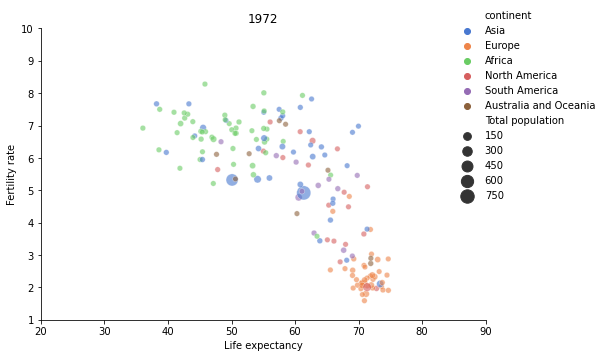

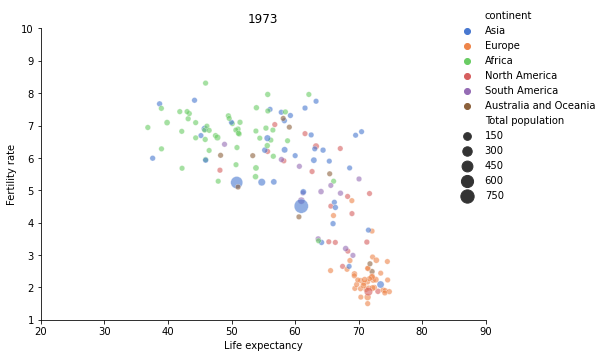

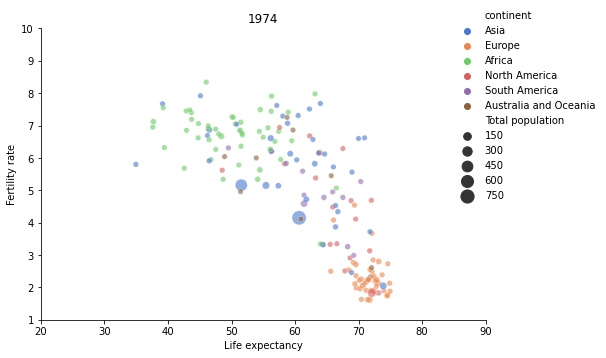

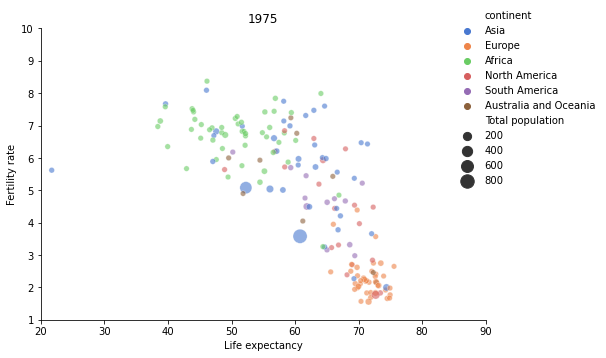

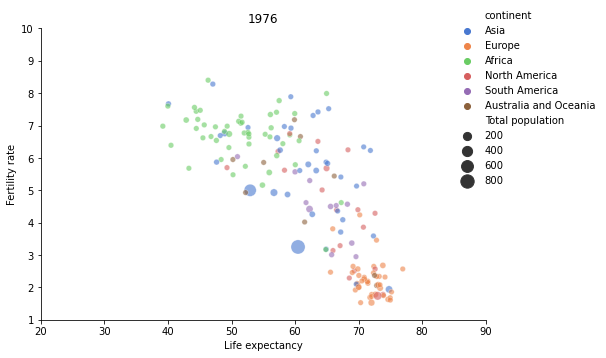

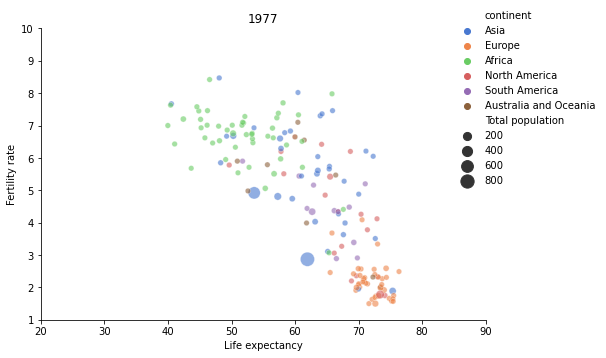

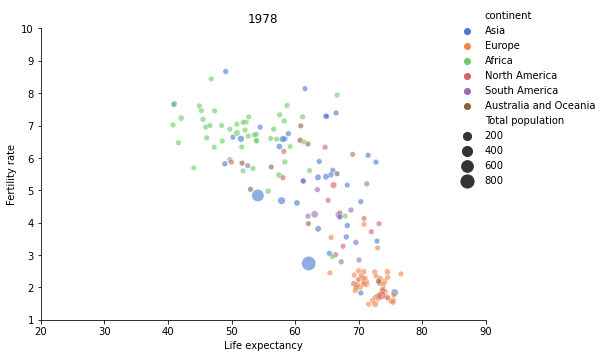

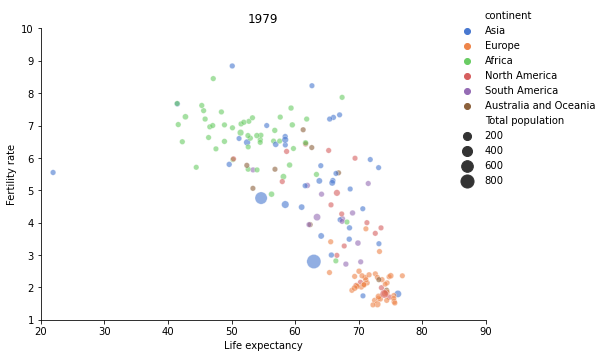

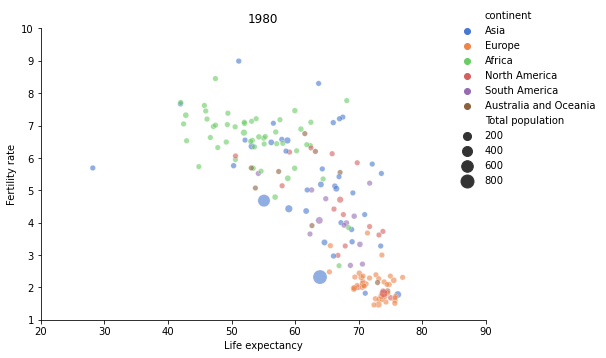

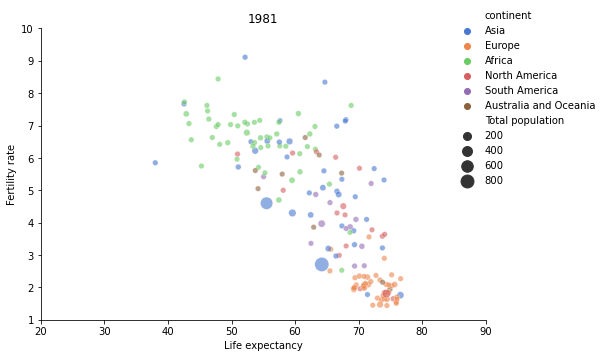

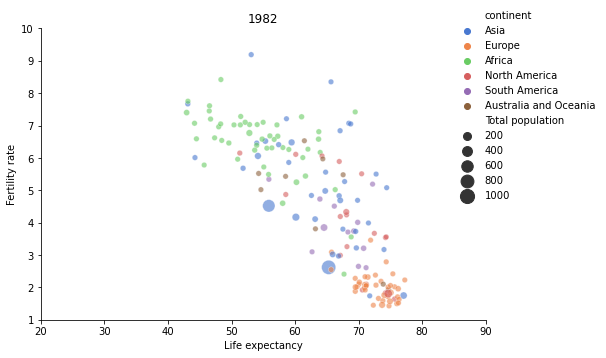

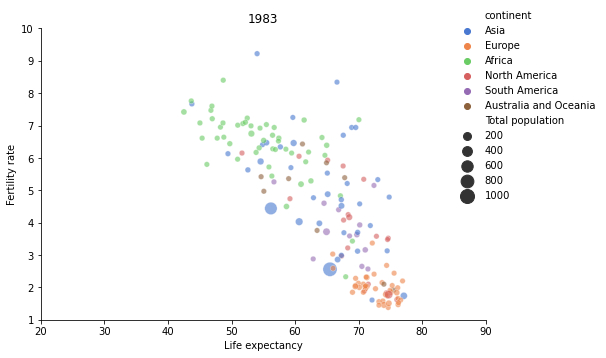

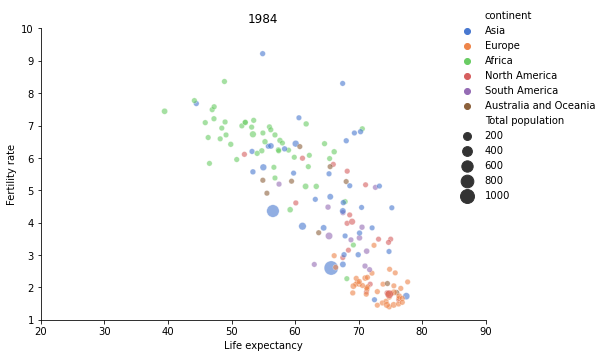

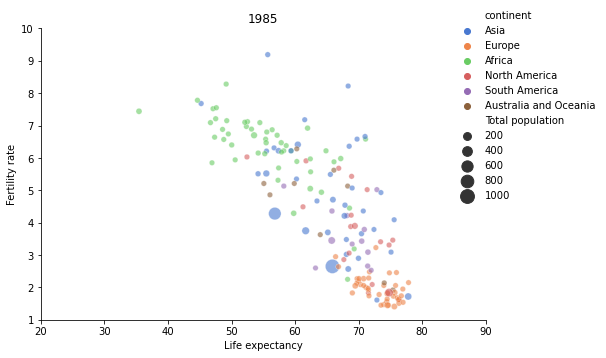

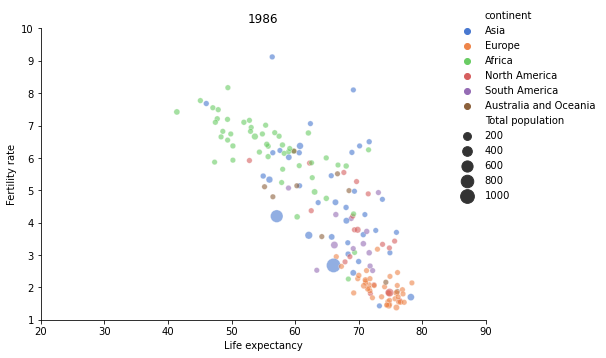

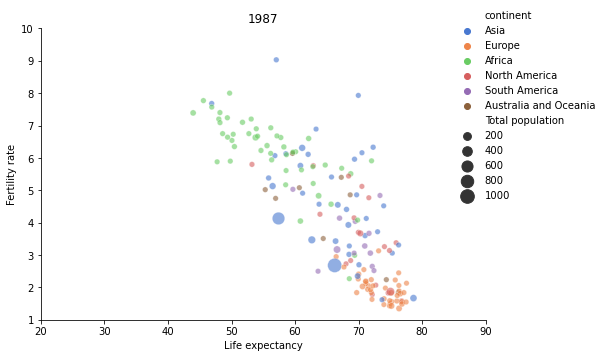

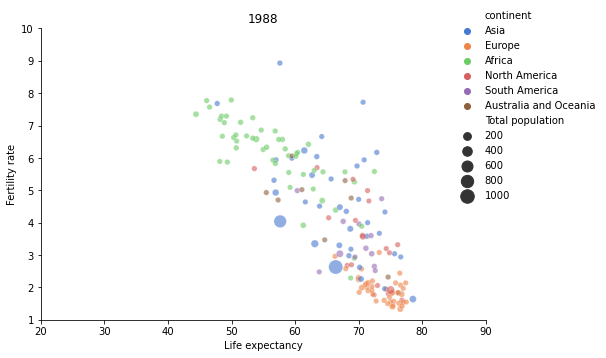

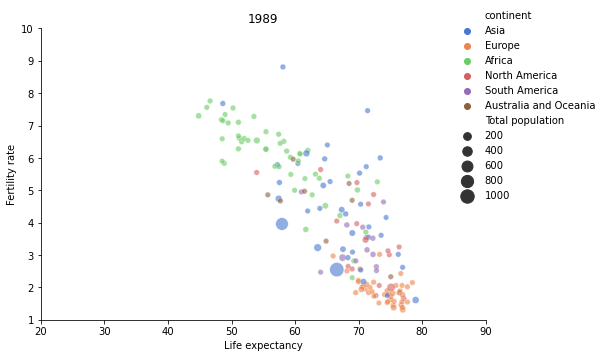

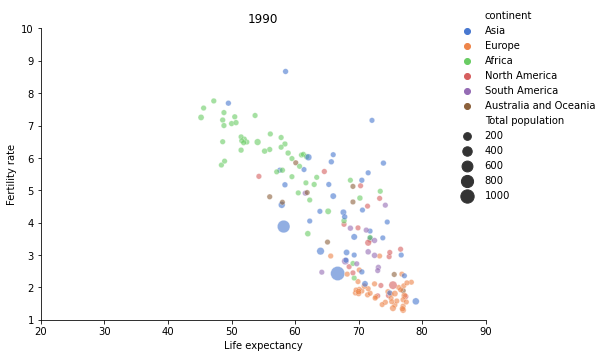

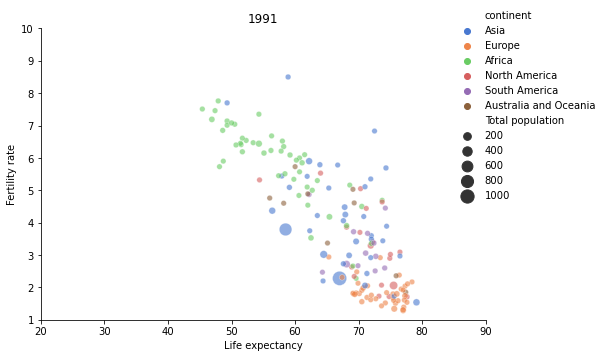

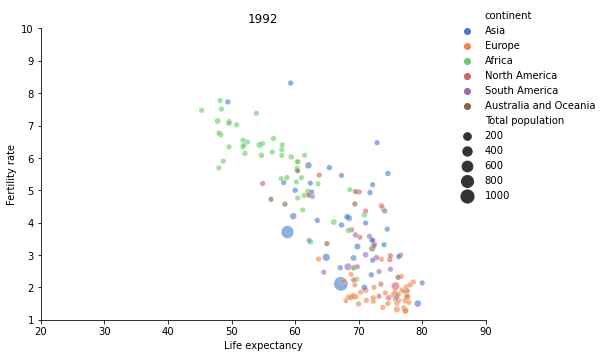

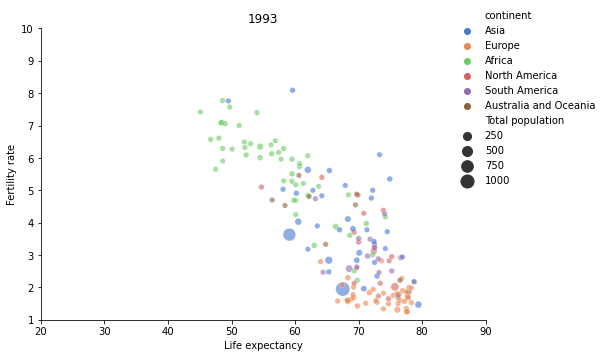

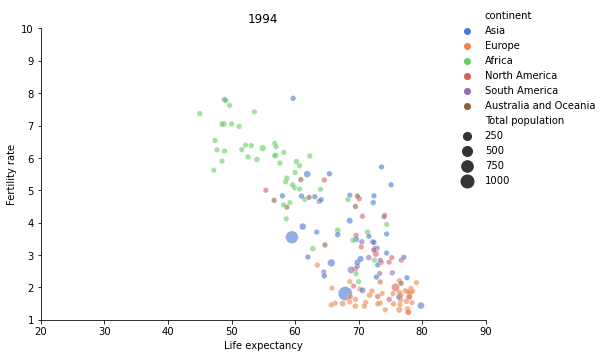

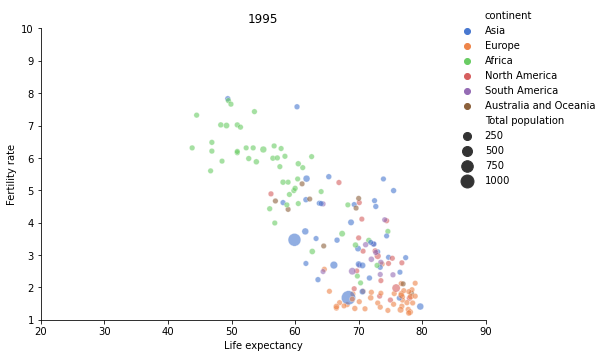

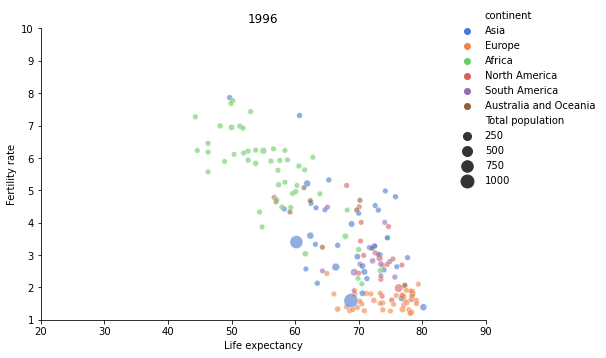

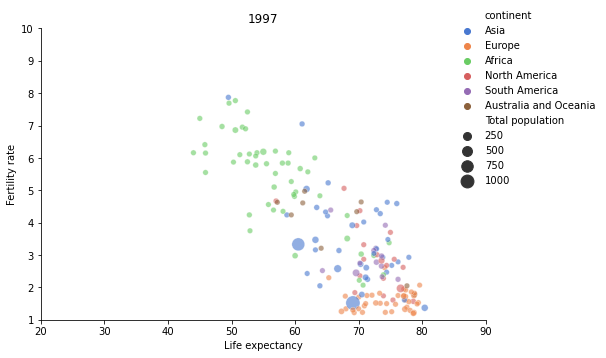

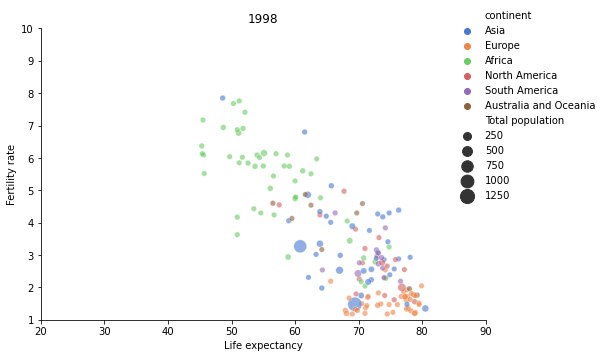

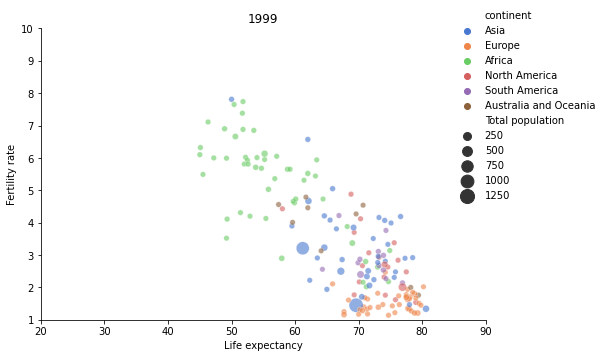

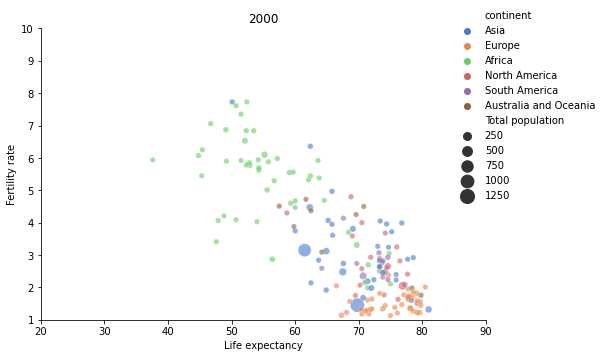

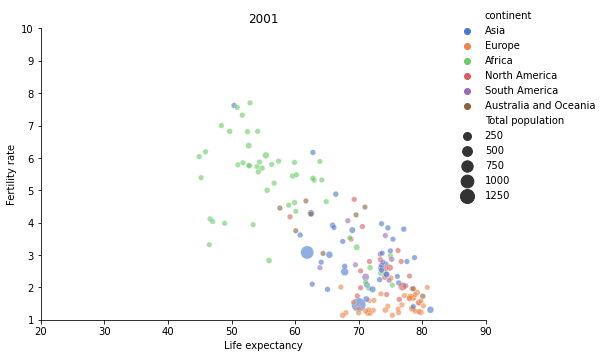

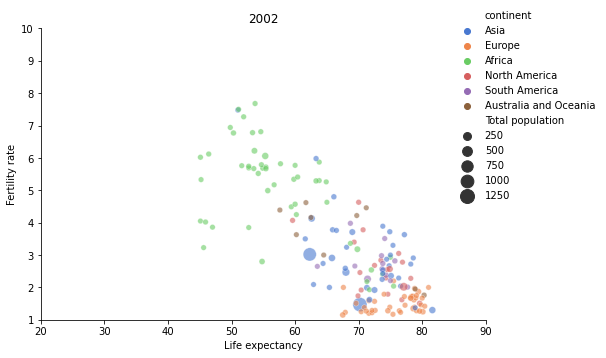

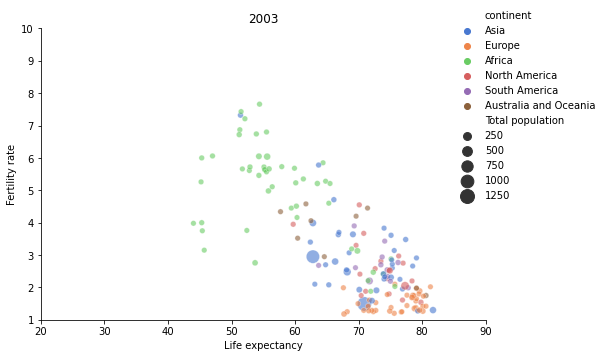

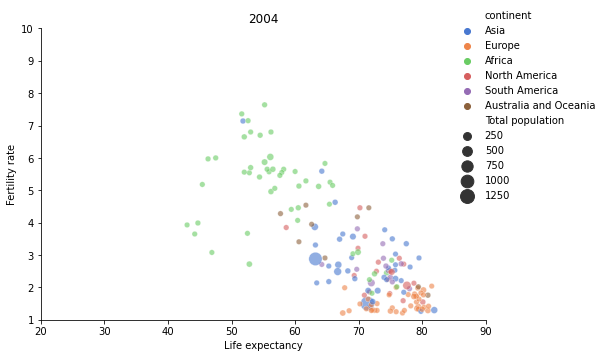

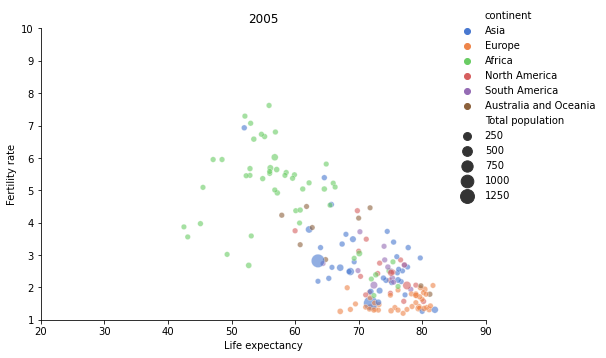

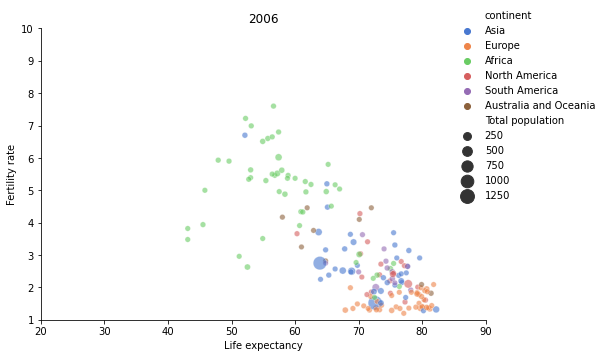

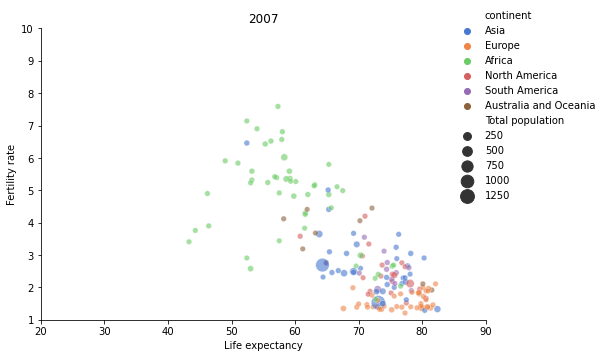

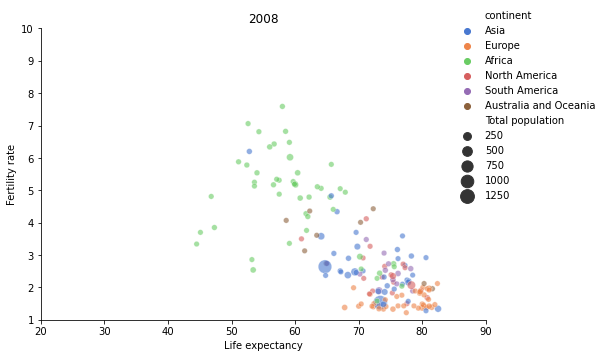

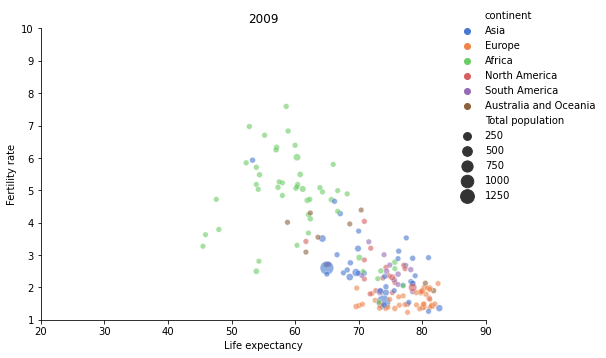

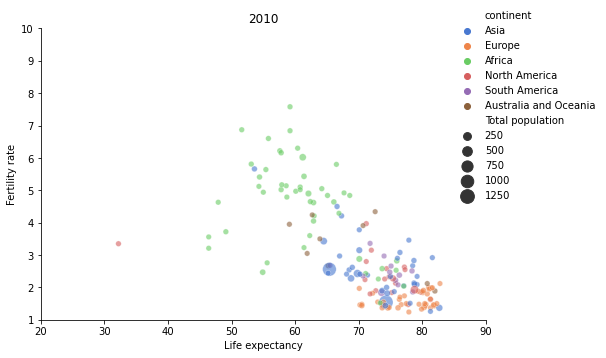

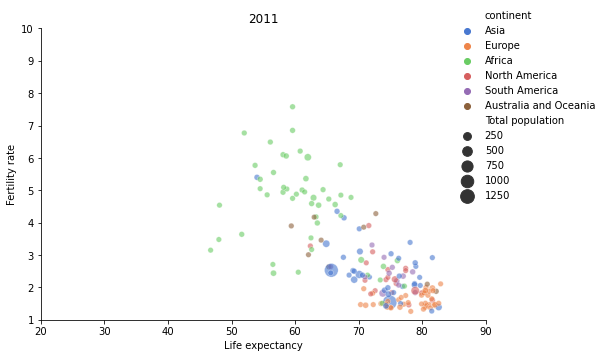

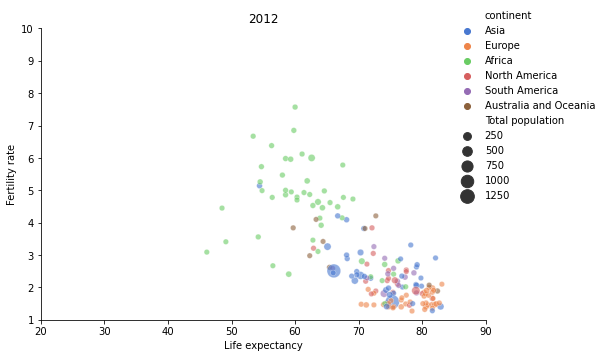

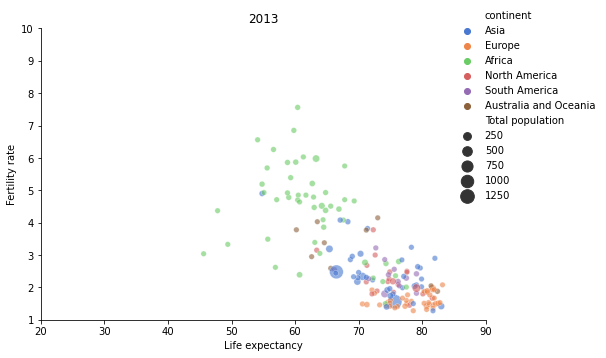

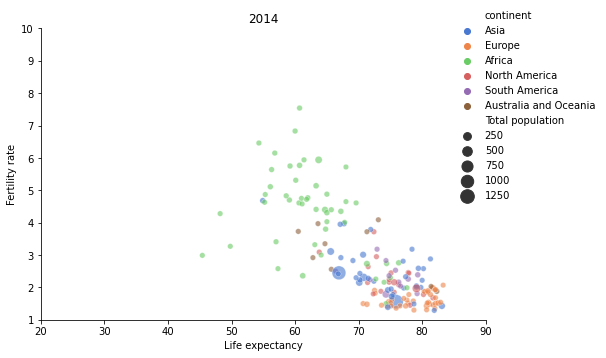

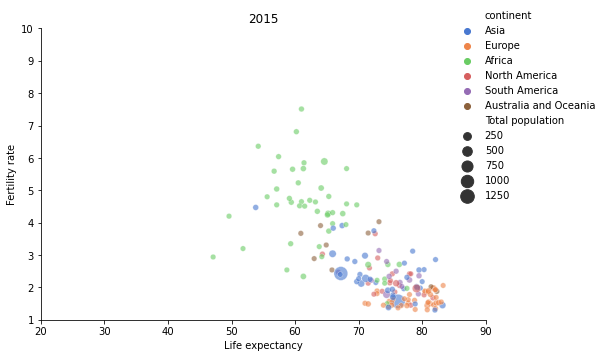

In [ ]:
years = list(set(data["year"]))

counter = 0
for year in years:
    data_temp = data[data["year"] == year]
    ax = sns.relplot(x="Life expectancy", y= "fertility_rate", data = data_temp, alpha = 0.6, size = "Total population", hue ="continent", palette="muted", sizes = (30, 200))
    sns.move_legend(ax, "upper right", bbox_to_anchor=(1.2, 1))
    plt.title(str(year))
    plt.xlabel("Life expectancy")
    plt.ylabel("Fertility rate")
    plt.axis((20, 90, 1, 10))
    plt.tight_layout()
    plt.savefig("scatterplots/lifeexp_"+str(year)+".png")
    plt.show()  
    plt.close()

In [ ]:
!pip install imageio

In [ ]:
# To generate a gif file from the individual pictures, 
# adjust the following code example and execute it:

import imageio

images = []

for i in range(1960, 2016):
    filename = 'scatterplots/lifeexp_{}.png'.format(i)
    images.append(imageio.imread(filename))
    
imageio.mimsave('animatedscatterplot.gif',images, fps=20)